In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('20230721-DDSales.txt', sep='\t')
df.head()


,Report Date,Sales Date,Quantity,Price,Subtotal,Isrc,Barcode,CDBabySku,Album Name,Artist Name,Track Name,Partner Name,Transaction Type,Delivery Country
0,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,7.0,0.000773,0.005415,ushm21787661,191924100799,infinitygirl,Stop Being on My Side,Infinity Girl,Walking Around,Pandora Radio,Stream,US
1,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,1.0,0.000773,0.000773,ushm21787664,191924100799,infinitygirl,Stop Being on My Side,Infinity Girl,By Now,Pandora Radio,Stream,US
2,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,2.0,0.000773,0.001547,ushm21787658,191924100799,infinitygirl,Stop Being on My Side,Infinity Girl,Poppyblush,Pandora Radio,Stream,US
3,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,40.0,0.000773,0.030940,ushm21787662,191924100799,infinitygirl,Stop Being on My Side,Infinity Girl,It's Easier Seeing You Now,Pandora Radio,Stream,US
4,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,36.0,0.000773,0.027846,ushm21787666,191924100799,infinitygirl,Stop Being on My Side,Infinity Girl,Pulling a Smile from a Drawer,Pandora Radio,Stream,US


In [9]:
df.drop(['Isrc','Barcode','CDBabySku'], axis='columns', inplace=True)
df.Quantity = df.Quantity.astype(int)
df.head()

,Report Date,Sales Date,Quantity,Price,Subtotal,Album Name,Artist Name,Track Name,Partner Name,Transaction Type,Delivery Country
0,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,7,0.000773,0.005415,Stop Being on My Side,Infinity Girl,Walking Around,Pandora Radio,Stream,US
1,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,1,0.000773,0.000773,Stop Being on My Side,Infinity Girl,By Now,Pandora Radio,Stream,US
2,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,2,0.000773,0.001547,Stop Being on My Side,Infinity Girl,Poppyblush,Pandora Radio,Stream,US
3,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,40,0.000773,0.030940,Stop Being on My Side,Infinity Girl,It's Easier Seeing You Now,Pandora Radio,Stream,US
4,10/16/2017 12:00:00 AM,8/15/2017 12:00:00 AM,36,0.000773,0.027846,Stop Being on My Side,Infinity Girl,Pulling a Smile from a Drawer,Pandora Radio,Stream,US


In [7]:
# Total number of all plays
sum(df.Quantity.values)

894597

In [10]:
# Total payout
sum(df.Subtotal.values)

3335.7953967868593

In [20]:
print("Unique countries: ")
countries = df['Delivery Country'].unique()
print(sorted(countries))

Unique countries: 
['AD', 'AE', 'AL', 'AM', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BD', 'BE', 'BG', 'BH', 'BM', 'BN', 'BO', 'BR', 'BS', 'BW', 'BY', 'BZ', 'CA', 'CH', 'CI', 'CL', 'CN', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FR', 'Family Mon', 'GB', 'GE', 'GH', 'GR', 'GT', 'GU', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'Individual', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LK', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MK', 'MM', 'MN', 'MO', 'MT', 'MU', 'MV', 'MX', 'MY', 'MZ', 'NG', 'NI', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PK', 'PL', 'PR', 'PS', 'PT', 'PY', 'QA', 'RE', 'RO', 'RS', 'RU', 'SA', 'SE', 'SG', 'SI', 'SK', 'SL', 'SM', 'SN', 'SR', 'SV', 'Student In', 'TH', 'TL', 'TN', 'TR', 'TT', 'TW', 'UA', 'UK', 'US', 'UY', 'UZ', 'Unknown', 'VE', 'VI', 'VN', 'XK', 'ZA']


In [12]:
print(df['Transaction Type'].unique())

['Stream' 'Download' 'Youtube' 'YouTube' 'Facebook' 'Royalty'
 'IG_MUSIC_OVERLAY' 'FB_PROFILE' 'FB_FROM_IG_CROSSPOST' 'IG_QUESTION'
 'IG_UGC_LIVE' 'IG_UGC' 'FB_MUSIC_OVERLAY' 'Facebook Audio Library'
 'Facebook UGC' 'YouTube Ad Supported' 'YouTube Subscriber'
 'YouTube Audio Tier']


In [21]:
partners = df['Partner Name'].unique()
print(sorted(partners))

['AWA', 'Amazon - UK - Prime', 'Amazon AMP', 'Amazon Cloud Drive - UK', 'Amazon Cloud Drive - US', 'Amazon DE Premium Service', 'Amazon ES Premium Service', 'Amazon FR Premium Service', 'Amazon JP Premium Service', 'Amazon MP3-DE', 'Amazon MP3-UK', 'Amazon Music', 'Amazon Premium ROE', 'Amazon Premium ROW', 'Amazon Prime - US', 'Amazon Prime IN', 'Amazon UK Premium Service', 'Amazon US AD supported', 'Amazon US Premium Service', 'Anghami', 'Apple Music', 'Apple iTunes', 'Boomplay', 'Deezer', 'Facebook', 'Google Locker', 'Google Music Store', 'Groove', 'KDigital', 'KKBox', 'MediaNet', 'Napster', 'NetEase Cloud Music', 'Pandora Plus', 'Pandora Premium', 'Pandora Radio', 'Qobuz', 'Resso', 'Saavn', 'Snapchat', 'SoundExchange', 'Spotify', 'Tencent Music Entertainment (TME)', 'Tidal', 'TikTok', 'Trebel', 'United Media Agency (UMA)', 'Yandex', 'YouTube CMS Publishing', 'YouTube Music', 'Youtube Content ID', 'iHeartRadio', 'iTunes - Apple Music - Australia', 'iTunes - Apple Music - Canada', 'i

In [26]:
for partner in sorted(partners):
    num_streams = sum(df[df['Partner Name'] == partner].Quantity)
    print('Partner:', partner, '-', num_streams)

Partner: AWA - 15
Partner: Amazon - UK - Prime - 2
Partner: Amazon AMP - 25
Partner: Amazon Cloud Drive - UK - 47
Partner: Amazon Cloud Drive - US - 218
Partner: Amazon DE Premium Service - 16
Partner: Amazon ES Premium Service - 1
Partner: Amazon FR Premium Service - 1
Partner: Amazon JP Premium Service - 33
Partner: Amazon MP3-DE - 3
Partner: Amazon MP3-UK - 1
Partner: Amazon Music - 13
Partner: Amazon Premium ROE - 2
Partner: Amazon Premium ROW - 138
Partner: Amazon Prime - US - 2
Partner: Amazon Prime IN - 57
Partner: Amazon UK Premium Service - 169
Partner: Amazon US AD supported - 3
Partner: Amazon US Premium Service - 838
Partner: Anghami - 61
Partner: Apple Music - 8001
Partner: Apple iTunes - 52
Partner: Boomplay - 5
Partner: Deezer - 1343
Partner: Facebook - 9376
Partner: Google Locker - 113
Partner: Google Music Store - 10402
Partner: Groove - 1
Partner: KDigital - 29
Partner: KKBox - 17
Partner: MediaNet - 4
Partner: Napster - 613
Partner: NetEase Cloud Music - 1566
Partner

In [33]:
# Look at streaming only (no downloads)

apple = df[(df['Partner Name'].str.contains('Apple')) & (df['Transaction Type'] == 'Stream')]
apple

,Report Date,Sales Date,Quantity,Price,Subtotal,Album Name,Artist Name,Track Name,Partner Name,Transaction Type,Delivery Country
43,10/27/2017 12:00:00 AM,9/15/2017 12:00:00 AM,1,0.008822,0.008822,Stop Being on My Side,Infinity Girl,Void,iTunes - Apple Music – US,Stream,US
44,10/27/2017 12:00:00 AM,9/15/2017 12:00:00 AM,2,0.008822,0.017645,Stop Being on My Side,Infinity Girl,Cannons,iTunes - Apple Music – US,Stream,US
45,10/27/2017 12:00:00 AM,9/15/2017 12:00:00 AM,1,0.011996,0.011996,Stop Being on My Side,Infinity Girl,Walking Around,iTunes - Apple Music - Rest of World,Stream,KR
46,10/27/2017 12:00:00 AM,9/15/2017 12:00:00 AM,1,0.011996,0.011996,Stop Being on My Side,Infinity Girl,Cellophane and Gold,iTunes - Apple Music - Rest of World,Stream,KR
47,10/27/2017 12:00:00 AM,9/15/2017 12:00:00 AM,1,0.008822,0.008822,Stop Being on My Side,Infinity Girl,Pulling a Smile from a Drawer,iTunes - Apple Music – US,Stream,US
...,...,...,...,...,...,...,...,...,...,...,...
120659,6/30/2023 12:00:00 AM,5/31/2023 12:00:00 AM,2,0.014247,0.028494,"Somewhere Nice, Someday",Infinity Girl,The Comfort of What I Had,Apple Music,Stream,GB
120660,6/30/2023 12:00:00 AM,5/31/2023 12:00:00 AM,1,0.014247,0.014247,"Somewhere Nice, Someday",Infinity Girl,But I'm Slow,Apple Music,Stream,GB
120661,6/30/2023 12:00:00 AM,5/31/2023 12:00:00 AM,1,0.014247,0.014247,"Somewhere Nice, Someday",Infinity Girl,Derail Me,Apple Music,Stream,GB
120662,6/30/2023 12:00:00 AM,5/31/2023 12:00:00 AM,1,0.003778,0.003778,"Somewhere Nice, Someday",Infinity Girl,The Comfort of What I Had,Apple Music,Stream,ID


In [34]:
spotify = df[(df['Partner Name'].str.contains('Spotify')) & (df['Transaction Type'] == 'Stream')]
spotify

,Report Date,Sales Date,Quantity,Price,Subtotal,Album Name,Artist Name,Track Name,Partner Name,Transaction Type,Delivery Country
118,11/8/2017 12:00:00 AM,8/15/2017 12:00:00 AM,2,0.007248,0.014496,Just Like Lovers,Infinity Girl,Taking Nothing,Spotify,Stream,GB
119,11/8/2017 12:00:00 AM,8/15/2017 12:00:00 AM,12,0.002022,0.024264,Just Like Lovers,Infinity Girl,Taking Nothing,Spotify,Stream,US
120,11/8/2017 12:00:00 AM,8/15/2017 12:00:00 AM,1,0.005636,0.005636,Just Like Lovers,Infinity Girl,Taking Nothing,Spotify,Stream,ES
121,11/8/2017 12:00:00 AM,8/15/2017 12:00:00 AM,2,0.003461,0.006921,Just Like Lovers,Infinity Girl,Taking Nothing,Spotify,Stream,BR
122,11/8/2017 12:00:00 AM,8/15/2017 12:00:00 AM,14,0.003056,0.042781,Just Like Lovers,Infinity Girl,Taking Nothing,Spotify,Stream,US
...,...,...,...,...,...,...,...,...,...,...,...
122482,7/11/2023 12:00:00 AM,4/30/2023 12:00:00 AM,1,0.005872,0.005872,"Somewhere Nice, Someday",Infinity Girl,Redder,Spotify,Stream,FI
122483,7/11/2023 12:00:00 AM,4/30/2023 12:00:00 AM,3,0.003217,0.009651,"Somewhere Nice, Someday",Infinity Girl,Redder,Spotify,Stream,FI
122484,7/11/2023 12:00:00 AM,4/30/2023 12:00:00 AM,1,0.005872,0.005872,"Somewhere Nice, Someday",Infinity Girl,Don't Believe,Spotify,Stream,FI
122485,7/11/2023 12:00:00 AM,4/30/2023 12:00:00 AM,7,0.003217,0.022518,"Somewhere Nice, Someday",Infinity Girl,The Comfort of What I Had,Spotify,Stream,FI


In [35]:
print("Total Apple plays: ", sum(apple.Quantity))
print("Total Spotify plays: ", sum(spotify.Quantity))

Total Apple plays:  56249
Total Spotify plays:  743130


In [36]:
print("Apple - Average per stream payout: ", np.mean(apple.Price))
print("Spotify - Average per stream payout: ", np.mean(spotify.Price))

Apple - Average per stream payout:  0.006123862347656989
Spotify - Average per stream payout:  0.002488128255136011


<Axes: xlabel='Price', ylabel='Partner Name'>

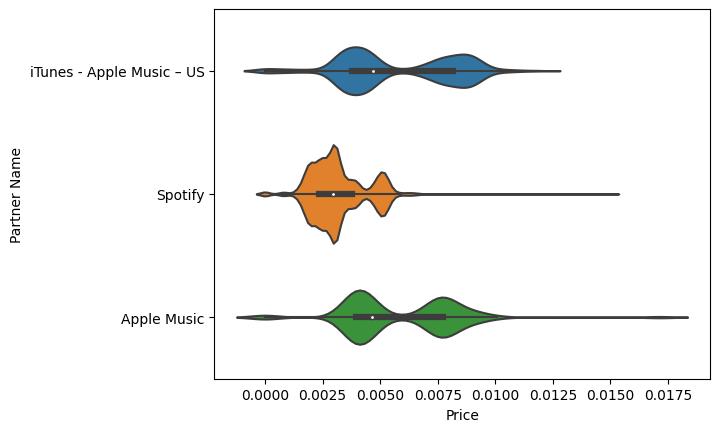

In [54]:
import seaborn as sns
#apple['Partner Name'] =  'Apple Music'
#df2 = pd.concat([apple, spotify])
#df2.Price = pd.to_numeric(df2.Price)
#df['your_column_name'] = pd.to_numeric(df['your_column_name'], errors='coerce').astype(int)
df2 = df[((df['Partner Name'].str.contains('Apple')) & (df['Transaction Type'] == 'Stream')) | (df['Partner Name'].str.contains('Spotify'))]


# Violin plots of payouts
sns.violinplot(data=df2[df2['Delivery Country']=='US'], x='Price', y='Partner Name')
